# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

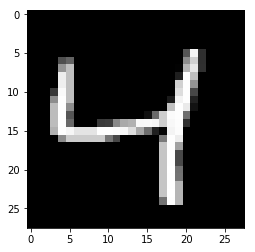

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [25]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

n_features = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, n_features])
targets_ = tf.placeholder(tf.float32, [None, n_features])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, n_features)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

(60000, 784)


## Training

In [22]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [23]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6930
Epoch: 1/20... Training loss: 0.6899
Epoch: 1/20... Training loss: 0.6862
Epoch: 1/20... Training loss: 0.6826
Epoch: 1/20... Training loss: 0.6776
Epoch: 1/20... Training loss: 0.6712
Epoch: 1/20... Training loss: 0.6644
Epoch: 1/20... Training loss: 0.6555
Epoch: 1/20... Training loss: 0.6463
Epoch: 1/20... Training loss: 0.6357
Epoch: 1/20... Training loss: 0.6232
Epoch: 1/20... Training loss: 0.6076
Epoch: 1/20... Training loss: 0.5927
Epoch: 1/20... Training loss: 0.5761
Epoch: 1/20... Training loss: 0.5633
Epoch: 1/20... Training loss: 0.5414
Epoch: 1/20... Training loss: 0.5265
Epoch: 1/20... Training loss: 0.5077
Epoch: 1/20... Training loss: 0.4915
Epoch: 1/20... Training loss: 0.4751
Epoch: 1/20... Training loss: 0.4564
Epoch: 1/20... Training loss: 0.4411
Epoch: 1/20... Training loss: 0.4247
Epoch: 1/20... Training loss: 0.4052
Epoch: 1/20... Training loss: 0.3963
Epoch: 1/20... Training loss: 0.3777
Epoch: 1/20... Training loss: 0.3766
E

Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.2022
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.2027
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1906
E

Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1676
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1639
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1562
E

Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1446
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1375
E

Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1301
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1229
E

Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1110
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1169
E

Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1048
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1133
E

Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1122
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1029
E

Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1006
E

Epoch: 7/20... Training loss: 0.0937
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0952
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0994
E

Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1017
E

Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0947
E

Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0882
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0897
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0896
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0888
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0893
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0894
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0887
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

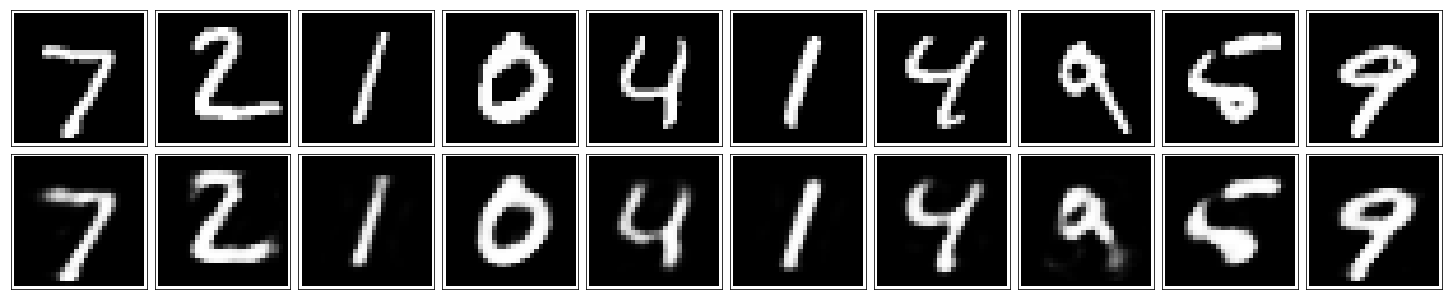

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.